<a href="https://colab.research.google.com/github/VeldiHruthika/Task-3-Linear-Regression/blob/main/Task_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libraries**

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Load the Dataset**

In [21]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# Show first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Preprocessing the Data**

In [22]:
# Check if any columns have nulls
print(df.isnull().sum())

# Drop rows with nulls (if any)
df.dropna(inplace=True)

# picking 'area' as input and 'price' as target
X = df[['area']]
y = df['price']

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# **Split the Data**

In [23]:
# Splitting data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train the Linear Regression Model**

In [24]:
# Create model and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Make Predictions**

In [25]:
# Predicting test data
y_pred = model.predict(X_test)

# **Evaluate the Model**

In [26]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


# **Plot the Regression Line *(for Simple Linear Regression*)**

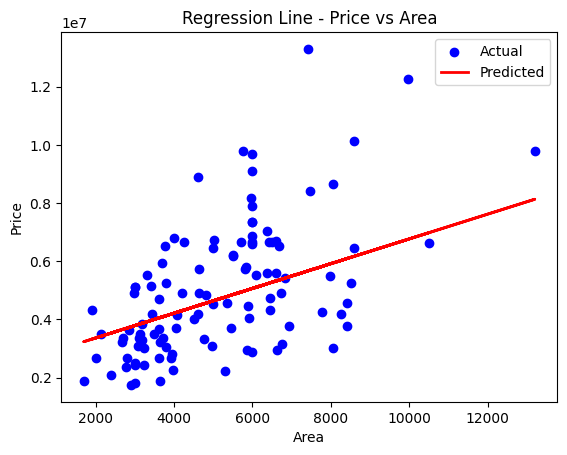

In [27]:
# Plotting regression line with actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line - Price vs Area')
plt.legend()
plt.show()

# **Print Coefficients (Interpretation)**

In [28]:
# printing the values of slope and intercept
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])

Intercept (b0): 2512254.2639593435
Coefficient (b1): 425.72984193878284


# **Multiple Linear Regression**

In [29]:
#Multiple linear regression with 3 features
X_multi = df[['area', 'bedrooms', 'bathrooms']]
y_multi = df['price']

# **Split the Data**

In [30]:
# Splitting data into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# **Train the Linear Regression Model** *(Multiple Linear Regression)*

In [31]:
# train the model
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

LinearRegression()

# **Make Predictions**

In [32]:
# Predicting data
y_pred_m = model_multi.predict(X_test_m)

# **Evaluate the Model**

In [33]:
# Evaluation metrics
print("MAE (Multiple):", mean_absolute_error(y_test_m, y_pred_m))
print("MSE (Multiple):", mean_squared_error(y_test_m, y_pred_m))
print("R² Score (Multiple):", r2_score(y_test_m, y_pred_m))

MAE (Multiple): 1265275.6699454375
MSE (Multiple): 2750040479309.0522
R² Score (Multiple): 0.4559299118872445


# **Print Coefficients**

In [34]:
# Show coefficients
print("\nCoefficients for multiple linear regression:")
for col, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{col}: {coef:.2f}")

# Intercept
print("Intercept:", model_multi.intercept_)


Coefficients for multiple linear regression:
area: 345.47
bedrooms: 360197.65
bathrooms: 1422319.66
Intercept: 59485.379208717495
